In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [2]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [3]:
print(knr.predict([[50]])) # 응? 1.5kg인데 왜 그러지?

[1033.33333333]


Text(0, 0.5, 'weight')

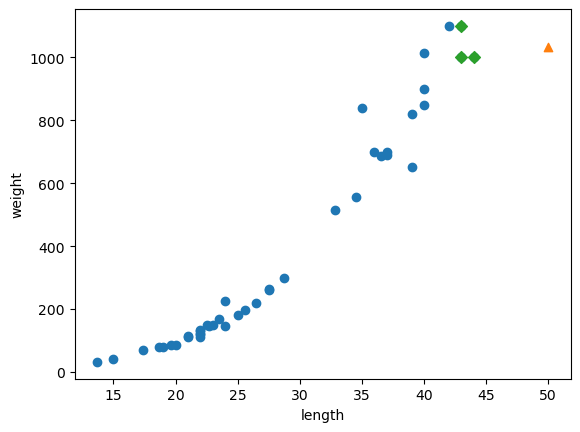

In [6]:
# k - 최근접 이웃 알고리즘의 함계
# 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있다.
import matplotlib.pyplot as plt
distances,indexes = knr.kneighbors([[50]])
plt.scatter(train_input,train_target)
plt.scatter(50, 1033, marker = '^')
plt.scatter(train_input[indexes],train_target[indexes],marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')

In [7]:
# 선형 회귀
# 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘
# 특성을 가장 잘 나타낼 수 있는 직선

from sklearn.linear_model import LinearRegression
lr =LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

# 50cm 농어 예측
lr.predict([[50]])

array([1241.83860323])

<h2>직선은 어떻게 그려질까?</h2>
<p>
y = ax + b 에서 x는 농어의 길이, y는 농어의 무게이다.
<br>
선형 회귀 모델은 기울기(a),절편(b)를 찾는다.
<br>
선형 회귀 모델은 기울기, 절편을 찾고, predict에 x 값이 들어왔을 때 y 값을 예측 값으로 리턴한다.
</p>

In [21]:
# coef_ : 기울기 값( 기울기를 종종 가중치, 종종 계수라고 부른다)
# intercept_ : 절편 값

print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535474


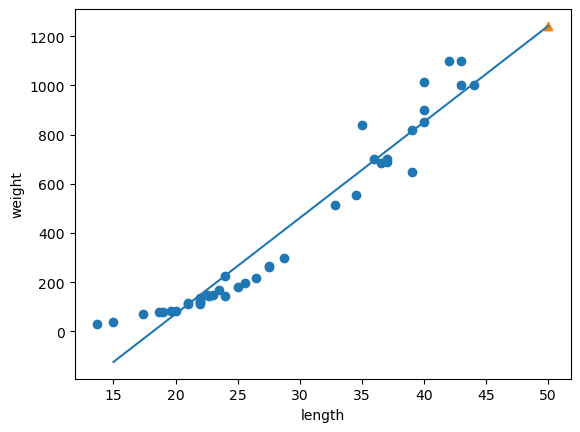

In [23]:
# 농어가 15cm 인 점과, 50cm인 점을 직선으로 나타내보자.
# 이 직선이 선형 회귀 알고리즘이 이 데이터셋에서 찾은 최적의 직선이다.
# 길이가 50cm인 농어에 대한 예측은 이 직선의 연장선에 있다.
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50,1241.8,marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

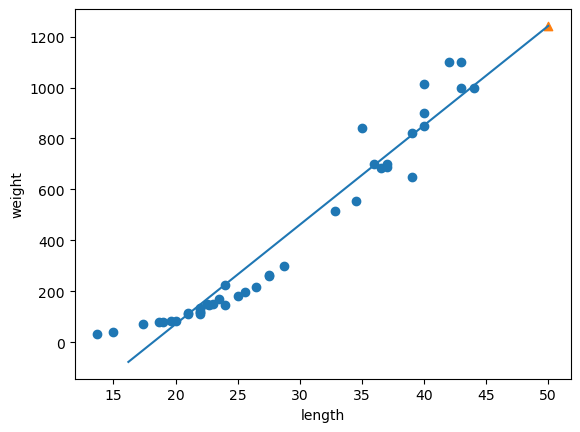

In [25]:
# 15cm가 아니라 다른 점을 넣어도 직선은 같게 나온다.
plt.scatter(train_input, train_target)
plt.plot([16.2,50], [16.2*lr.coef_ + lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50,1241.8,marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [27]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

# 훈련 세트의 성능이 테스트 세트보다 현저히 높다. -> 과대 적합
# 테스트 세트 성능이 낮다. 그러고 보니 훈련 세트 성능도 그다지 높지 않다 -> 과소 적합
# 그러고 보니 그래프 왼쪽 아래도 문제가 많아 보인다 ^^;

0.9398463339976041
0.824750312331356


<p>위 문제에서 선형 회귀를 사용하면 농어의 <mark>무게가 음수가</mark> 되는 현상이 벌어진다.</p>
<p>엄밀하게는 최적의 직선보다는 <mark>최적의 곡선</mark>을 찾아야 맞다.</p>
<p>즉, 무게 = a * 길이^2 + b * 길이 + c 를 찾아야 한다</p>

In [28]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [30]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2,50]]))
# 미친 정확성을 보인다.

[1573.98423528]


In [37]:
print(lr.coef_,lr.intercept_)
print(lr.coef_[0])

[  1.01433211 -21.55792498] 116.05021078278338
1.0143321093767306


<h1>다항 회귀</h1>
<p> 
이러한 다항식을 이용한 선형 회귀를 다항 회귀라고 한다.
<br>
이런 2차 방정식도 선형 회귀이다. 길이^2은 길이로 치환 가능하기 때문이다.
<br>
즉, y = ax^2 + bx + c 를 y = (ax+b)x + c 로 보면 그만이다.
</p>

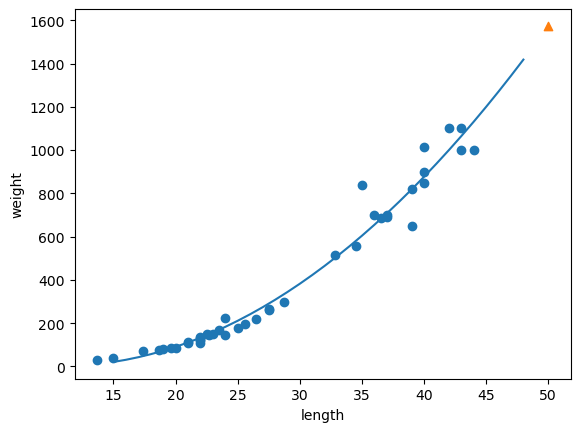

In [50]:
# 구간별 직선을 그리기 위해 15에서 49까지의 정수 배열을 만든다.
point = np.arange(15,49)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input,train_target)

# 15에서 49까지 2차 방정식 그래프를 그린다
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)

# 50cm 농어 데이터
plt.scatter(50,1574,marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [52]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 훈련 세트와 테스트 세트에 대한 차이가 줄었다.
# 하지만, 여전히 테스트 세트 점수가 좀 더 높다.
# 좀 더 복잡한 모델이 필요하다.

0.9706807451768623
0.9775935108325122
